<a href="https://colab.research.google.com/github/HimaBinduUppu/HimaBinduUppu/blob/main/BIG_DATA_PROJECT_ELECTRIC_VEHICLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Display the first few rows
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
import pandas as pd

# Assuming you've already uploaded the file via files.upload()
# Load the dataset into a DataFrame and assign it to the 'ev_data' variable
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Drop rows with missing values for the specified columns
ev_data_clean = ev_data.dropna(subset=['Electric Range', 'Model Year', 'Base MSRP'])

# Display the cleaned data
ev_data_clean.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Drop rows with missing values for simplicity
ev_data_clean = ev_data.dropna(subset=['Electric Range', 'Model Year', 'Base MSRP'])

# Selecting features (could be expanded based on feature importance)
X = ev_data_clean[['Model Year', 'Base MSRP']]
y = ev_data_clean['Electric Range']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Display the Mean Squared Error
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 5746.8201196000355


In [6]:
# List available columns in the dataset
print(ev_data_clean.columns)


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [7]:
# Adjust the features based on available data
X = ev_data_clean[['Model Year', 'Base MSRP']]  # Add other available columns if needed

# Splitting the data again with new features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, fit the model using the scaled data
lr_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_scaled = lr_model.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

print(f"Mean Squared Error after scaling: {mse_scaled}")


Mean Squared Error after scaling: 5746.820119600048


In [9]:
from sklearn.linear_model import Ridge, Lasso

# Initialize and fit Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha controls the regularization strength
ridge_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error with Ridge Regression: {mse_ridge}")

# Initialize and fit Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Lasso with smaller alpha
lasso_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean Squared Error with Lasso Regression: {mse_lasso}")


Mean Squared Error with Ridge Regression: 5746.820277427066
Mean Squared Error with Lasso Regression: 5746.8229235008


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Mean Squared Error with Random Forest: {mse_rf}")


Mean Squared Error with Random Forest: 2054.2841298755584


In [16]:
# Label encoding the target variable using .loc
ev_data_clean.loc[:, 'EV_Type_Encoded'] = le.fit_transform(ev_data_clean['Electric Vehicle Type'])


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Drop rows with missing values for simplicity and create a copy
ev_data_clean = ev_data.dropna(subset=['Electric Vehicle Type', 'Model Year', 'Electric Range', 'Base MSRP']).copy()

# Label encoding the target variable
le = LabelEncoder()
ev_data_clean['EV_Type_Encoded'] = le.fit_transform(ev_data_clean['Electric Vehicle Type'])

# Selecting features
X = ev_data_clean[['Model Year', 'Electric Range', 'Base MSRP']]
y = ev_data_clean['EV_Type_Encoded']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy: {accuracy}")


Accuracy: 0.8032224304524546


Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.8032224304524546
                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       0.81      0.98      0.89     32386
Plug-in Hybrid Electric Vehicle (PHEV)       0.66      0.14      0.24      8701

                              accuracy                           0.80     41087
                             macro avg       0.74      0.56      0.56     41087
                          weighted avg       0.78      0.80      0.75     41087



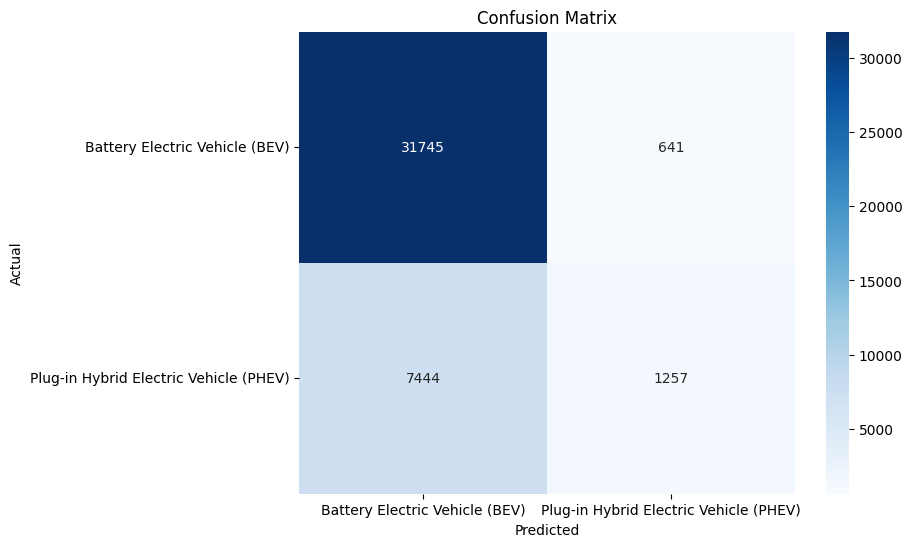

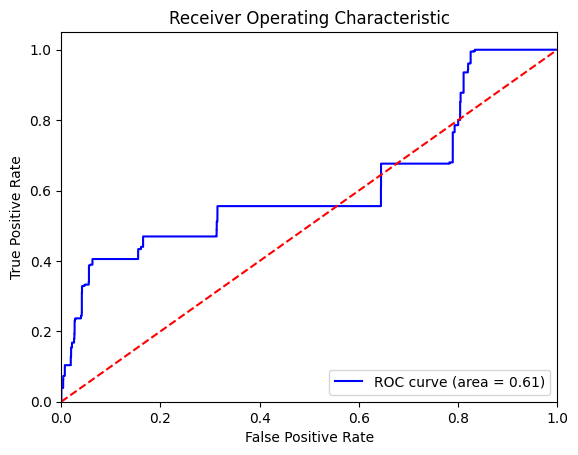

Cross-validated Accuracy: 0.7935900526565931
Random Forest Accuracy: 0.9999756614014165


In [19]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Assuming ev_data is your original DataFrame
# Drop rows with missing values and create a copy
ev_data_clean = ev_data.dropna(subset=['Electric Vehicle Type', 'Model Year', 'Electric Range', 'Base MSRP']).copy()

# Label encoding the target variable
le = LabelEncoder()
ev_data_clean['EV_Type_Encoded'] = le.fit_transform(ev_data_clean['Electric Vehicle Type'])

# Selecting features - you can add more features here if available
X = ev_data_clean[['Model Year', 'Electric Range', 'Base MSRP']]
y = ev_data_clean['EV_Type_Encoded']

# One-hot encoding if there are categorical variables (not used here, but for future)
# X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # L1 penalty not supported in multiclass with logistic regression
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Additional metrics
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)  # Adjust pos_label as necessary
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f"Cross-validated Accuracy: {np.mean(cv_scores)}")

# Comparing with Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest Accuracy: {rf_accuracy}")


<ipython-input-20-3776f32b095d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_data_clean['Cluster'] = kmeans.fit_predict(X)


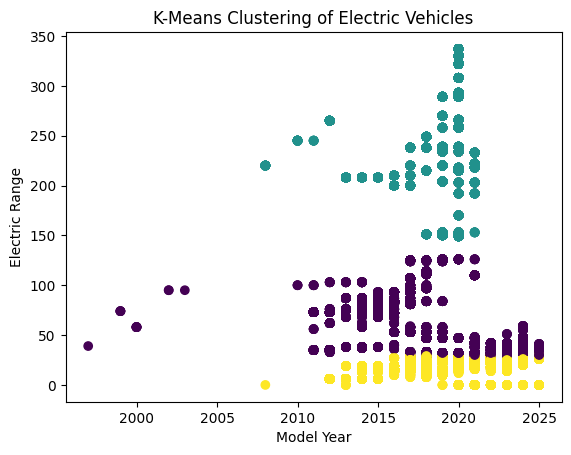

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop rows with missing values
ev_data_clean = ev_data.dropna(subset=['Legislative District', 'Electric Range', 'Model Year'])

# Selecting features for clustering
X = ev_data_clean[['Model Year', 'Electric Range', 'Legislative District']]

# Initializing and fitting the model
kmeans = KMeans(n_clusters=3, random_state=42)
ev_data_clean['Cluster'] = kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X['Model Year'], X['Electric Range'], c=ev_data_clean['Cluster'], cmap='viridis')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.title('K-Means Clustering of Electric Vehicles')
plt.show()


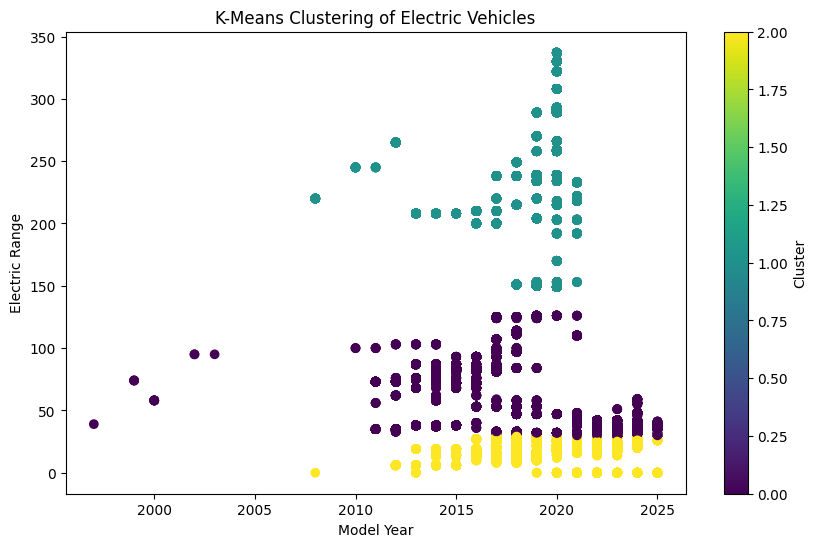

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop rows with missing values and create a copy
ev_data_clean = ev_data.dropna(subset=['Legislative District', 'Electric Range', 'Model Year']).copy()

# Selecting features for clustering
X = ev_data_clean[['Model Year', 'Electric Range', 'Legislative District']]

# Initializing and fitting the model
kmeans = KMeans(n_clusters=3, random_state=42)
ev_data_clean.loc[:, 'Cluster'] = kmeans.fit_predict(X)  # Use .loc to avoid the warning

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Model Year'], X['Electric Range'], c=ev_data_clean['Cluster'], cmap='viridis')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.title('K-Means Clustering of Electric Vehicles')
plt.colorbar(label='Cluster')
plt.show()
